<a href="https://colab.research.google.com/github/Sanarazaaa/Bio-and-Numpy/blob/main/Bio_and_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

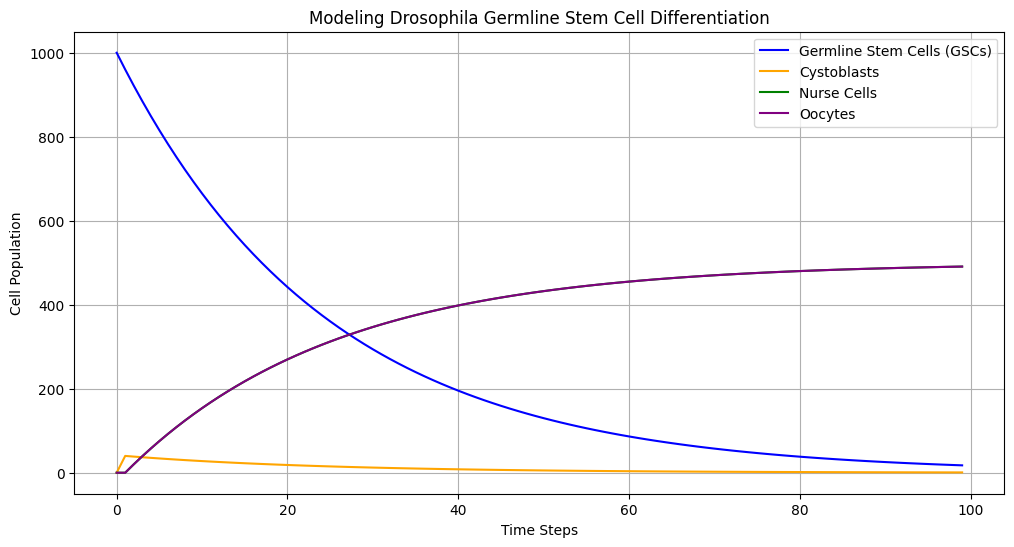

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps = 100  # Number of time steps in the simulation
initial_GSCs = 1000  # Initial number of GSCs
chromatin_opening_rate = 0.02  # Rate of chromatin opening
transposon_activity_rate = 0.01  # Rate of transposon activity
metabolic_reprogramming_effect = 0.03  # Effect of metabolic changes on differentiation

# Initialize arrays to store the number of GSCs, cystoblasts, nurse cells, and oocytes
GSCs = np.zeros(num_steps)
cystoblasts = np.zeros(num_steps)
nurse_cells = np.zeros(num_steps)
oocytes = np.zeros(num_steps)

# Set initial conditions
GSCs[0] = initial_GSCs

# Simulate differentiation process
for t in range(1, num_steps):
    # Calculate differentiation based on chromatin state and transposon activity
    differentiation_rate = (chromatin_opening_rate - transposon_activity_rate) + metabolic_reprogramming_effect

    # Update populations
    new_cystoblasts = GSCs[t-1] * differentiation_rate
    cystoblasts[t] = cystoblasts[t-1] + new_cystoblasts
    GSCs[t] = GSCs[t-1] - new_cystoblasts

    # Further differentiation of cystoblasts into nurse cells and oocytes
    new_nurse_cells = cystoblasts[t-1] * 0.5  # Assume half become nurse cells
    new_oocytes = cystoblasts[t-1] * 0.5  # Assume half become oocytes
    nurse_cells[t] = nurse_cells[t-1] + new_nurse_cells
    oocytes[t] = oocytes[t-1] + new_oocytes
    cystoblasts[t] -= (new_nurse_cells + new_oocytes)  # Update cystoblasts

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(GSCs, label='Germline Stem Cells (GSCs)', color='blue')
plt.plot(cystoblasts, label='Cystoblasts', color='orange')
plt.plot(nurse_cells, label='Nurse Cells', color='green')
plt.plot(oocytes, label='Oocytes', color='purple')
plt.title('Modeling Drosophila Germline Stem Cell Differentiation')
plt.xlabel('Time Steps')
plt.ylabel('Cell Population')
plt.legend()
plt.grid()
plt.show()